References: https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/ 

In [8]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Previously, we've seen how to use Linear Regression for Predictions

## In this example we are going to work with the same dataset:
__40 observations of people brain related indicators to predict if it belongs to a Male or Female.__ <br>
Full Scale IQ (combines performance of the VCI, PRI, WMI, and PSI),<br> 
Verbal IQ (verbal comprehension and working memory),<br> 
Performance IQ (perceptual organization and processing speed) <br>
Magnetic Resonance Imagine is used to determine the brain size of individuals.

In [3]:
file_name = 'brain_size.csv'
path = os.getcwd() + '/../Datasets/' + file_name
data = pd.read_csv(path, na_values=".")#, sep=';', na_values=".")
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [4]:
data.Gender = data.Gender.astype('category')
data.Gender = data.Gender.cat.codes
male = data[data.Gender == 1]
female = data[data.Gender == 0]

male = male.fillna(male.mean())
female = female.fillna(female.mean())

data = pd.concat([male, female])
print(data.shape)
data.head()

(40, 7)


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,1,140,150,124,166.444444,72.5,1001121
2,1,139,123,150,143.000000,73.3,1038437
3,1,133,129,128,172.000000,68.8,965353
8,1,89,93,84,134.000000,66.3,904858
9,1,133,114,147,172.000000,68.8,955466


### Let's apply Logistic Regression Model

Let's recall what our data looks like <br>
(I skip plotting the non-representative features) <br>

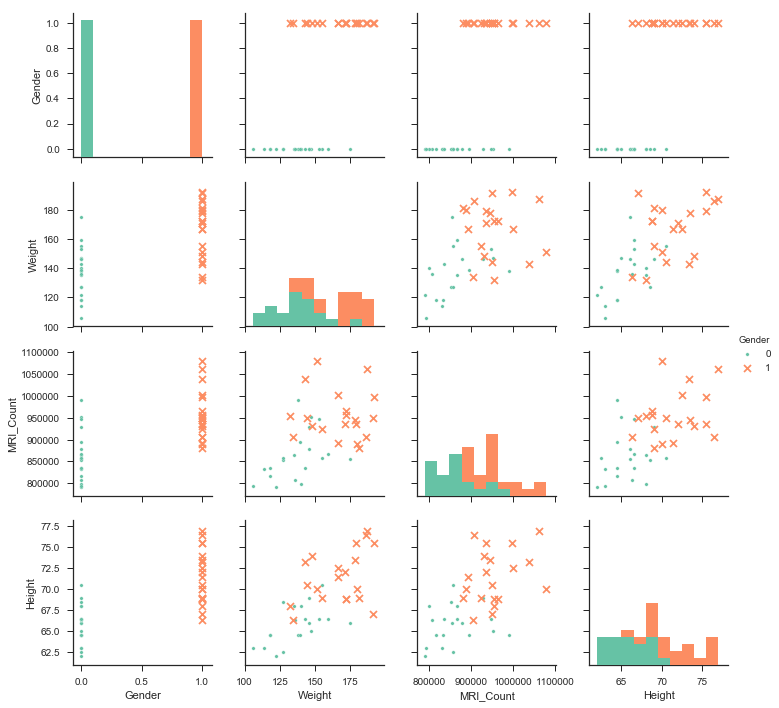

In [107]:
cols = ['Gender', 'Weight', 'MRI_Count', 'Height']
df = data[cols]

graph = sns.pairplot(df, markers=[".", 'x'],
                     hue='Gender')

Now lets see how Logistic Regression Looks like within our dataset context

/Users/yeldosbalgabekov/anaconda2/envs/py35/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:168: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


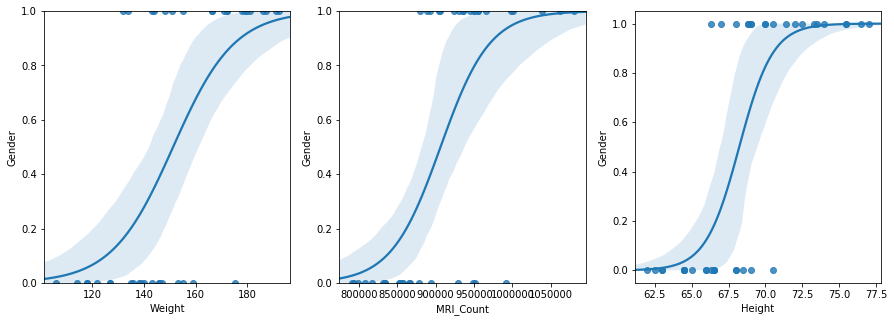

In [7]:
cols = ['Gender', 'Weight', 'MRI_Count', 'Height']
df = data[cols]

plt.figure(figsize=(15, 5))

for idx, col in enumerate(['Weight', 'MRI_Count', 'Height']):
    plt.ylim(0,1)
    plt.subplot('13{}'.format(idx+1))
    sns.regplot(x=col, y="Gender", data=df, logistic=True)

On the above figures we can see a Logistic Regression model behaviour. So we can use "above/below" thresholds for decision making.

It differs from Linear Models by its curviness as well as bottom and top caps, which makes it more suitable for our case.

Let's split the data into training and testing sets

In [10]:
cols = ['Gender', 'Weight', 'MRI_Count', 'Height']
df = data[cols]

accs = []

# lets take the average accuracy of 500 iterations
for i in range(500):
    train, test = train_test_split(df, test_size=0.2)
    x_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
    x_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]

    # Use sklearn's Linear Regression model
    model = LogisticRegression()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    prediction = [1 if label >= 0.5 else 0 for label in prediction]
    acc = sum(prediction == y_test)/len(y_test)*100
    accs.append(acc)
res = sum(accs) / len(accs)
print("Average Accuracy: {}%".format(res))

Average Accuracy: 56.125%


### Let's Check if there is a difference using one, two, three features

In [13]:
df = data[['Gender', 'Weight', 'MRI_Count', 'Height']]
accs = {i: [] for i in range(7)}
scenarios = [['Weight', 'MRI_Count', 'Height'], 
                ['Weight', 'MRI_Count'], 
                ['Weight', 'Height'], 
                ['MRI_Count', 'Height'], 
                ['Weight'], 
                ['MRI_Count'], 
                ['Height']]

for i in range(500):
    train, test = train_test_split(df, test_size=0.2)
    for idx, cols in enumerate(scenarios):
        
        # the average accuracy of 100 iterations
        x_train, y_train = train[cols], train['Gender']
        x_test, y_test = test[cols], test['Gender']

        # Use sklearn's Linear Regression model
        model = LogisticRegression()
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        prediction = [1 if label >= 0.5 else 0 for label in prediction]
        
        acc = sum(prediction == y_test)/len(y_test)*100
        accs[idx].append(acc)

In [14]:
accs1 = pd.DataFrame.from_dict(accs)
for idx, cols in enumerate(scenarios):
    print(idx, cols)
accs1.describe()

0 ['Weight', 'MRI_Count', 'Height']
1 ['Weight', 'MRI_Count']
2 ['Weight', 'Height']
3 ['MRI_Count', 'Height']
4 ['Weight']
5 ['MRI_Count']
6 ['Height']


,0,1,2,3,4,5,6
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,57.450000,56.625000,69.27500,40.000000,60.300000,38.025000,41.375000
std,18.780386,18.664635,14.93261,11.817542,18.050253,9.949113,12.423992
min,12.500000,12.500000,25.00000,12.500000,12.500000,12.500000,12.500000
25%,50.000000,50.000000,62.50000,37.500000,50.000000,37.500000,37.500000
50%,62.500000,62.500000,75.00000,37.500000,62.500000,37.500000,37.500000
75%,75.000000,75.000000,75.00000,50.000000,75.000000,50.000000,50.000000
max,100.000000,100.000000,100.00000,75.000000,100.000000,62.500000,75.000000


So we can see that the highest result shows Weight + Height features, with std 11.22

### Can we improve the results even higher

We can see that Weight ranges from min 106 to max 192, and Height from min 62 to max 77. <br>


Let's normalise the data (min max scaler)

In [15]:
df = (df - df.min()) / (df.max()-df.min())
df.describe()

,Gender,Weight,MRI_Count,Height
count,40.00000,40.000000,40.000000,40.000000
mean,0.50000,0.532817,0.408874,0.439886
std,0.50637,0.268832,0.250171,0.264652
min,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.345930,0.226005,0.266667
50%,0.50000,0.482558,0.397259,0.416667
75%,1.00000,0.767442,0.551895,0.582193
max,1.00000,1.000000,1.000000,1.000000


In [20]:
df = data[['Gender', 'Weight', 'MRI_Count', 'Height']]
df = (df - df.min()) / (df.max()-df.min())
accs = {i: [] for i in range(7)}
scenarios = [['Weight', 'MRI_Count', 'Height'], 
                ['Weight', 'MRI_Count'], 
                ['Weight', 'Height'], 
                ['MRI_Count', 'Height'], 
                ['Weight'], 
                ['MRI_Count'], 
                ['Height']]

for i in range(500):
    train, test = train_test_split(df, test_size=0.2)
    for idx, cols in enumerate(scenarios):
        
        # the average accuracy of 100 iterations
        x_train, y_train = train[cols], train['Gender']
        x_test, y_test = test[cols], test['Gender']

        # Use sklearn's Linear Regression model
        model = LogisticRegression()
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        prediction = [1 if label >= 0.5 else 0 for label in prediction]
        
        acc = sum(prediction == y_test)/len(y_test)*100
        accs[idx].append(acc)

In [21]:
accs2 = pd.DataFrame.from_dict(accs)
for idx, cols in enumerate(scenarios):
    print(idx, cols)
accs2.describe()

0 ['Weight', 'MRI_Count', 'Height']
1 ['Weight', 'MRI_Count']
2 ['Weight', 'Height']
3 ['MRI_Count', 'Height']
4 ['Weight']
5 ['MRI_Count']
6 ['Height']


,0,1,2,3,4,5,6
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,81.025000,77.100000,80.50000,82.725000,70.675000,76.625000,79.750000
std,13.852641,14.265237,15.29601,12.882888,16.515975,15.020756,14.654077
min,25.000000,25.000000,12.50000,37.500000,25.000000,12.500000,25.000000
25%,75.000000,62.500000,75.00000,75.000000,62.500000,62.500000,75.000000
50%,87.500000,75.000000,87.50000,87.500000,75.000000,75.000000,87.500000
75%,87.500000,87.500000,87.50000,87.500000,87.500000,87.500000,87.500000
max,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
